Problem -  Will user will purchase it or not


In [30]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import classification_report,confusion_matrix

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

import warnings

In [31]:
warnings.filterwarnings('ignore')

In [32]:
ds_ads = pd.read_csv('Social_Network_Ads.csv')
ds_ads.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [33]:
ds_ads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [34]:
ds_ads['Purchased'].value_counts()


0    257
1    143
Name: Purchased, dtype: int64

In [43]:
ds_ads = ds_ads.drop(['User ID'],axis=1)

#EDA

We have dtypes - int64,object.

In [44]:
ds_ads_numeric = ds_ads.select_dtypes(include=['int64'])
ds_ads_category = ds_ads.select_dtypes(include=['object'])

In [45]:
ds_ads_category.head()

,Gender
0,Male
1,Male
2,Female
3,Female
4,Male


<Figure size 1440x720 with 0 Axes>

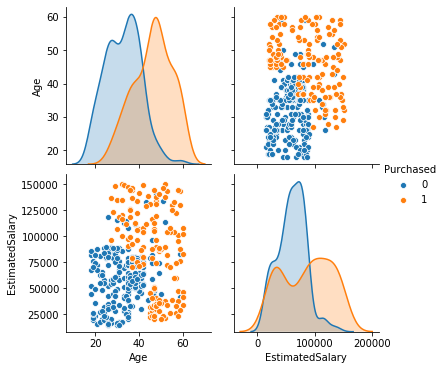

In [46]:
plt.figure(figsize=(20,10))
sns.pairplot(ds_ads_numeric,hue='Purchased')
plt.show()

In [47]:
cor = ds_ads_numeric.corr()
cor

,Age,EstimatedSalary,Purchased
Age,1.000000,0.155238,0.622454
EstimatedSalary,0.155238,1.000000,0.362083
Purchased,0.622454,0.362083,1.000000


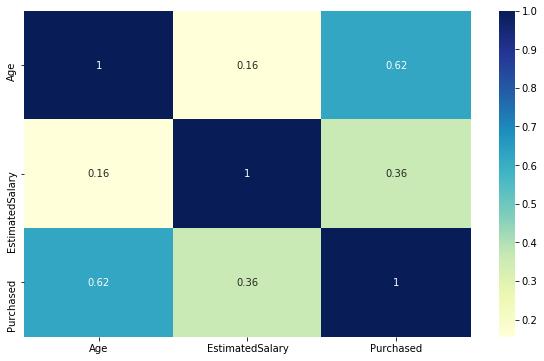

In [48]:
plt.figure(figsize=(10,6))
sns.heatmap(cor,cmap='YlGnBu',annot=True)
plt.show()

From heatmap, we can find Purchased has  co-relation with Age,EstimatedSalary.

In [49]:
# Data Preparation for Category Features

ds_ads_dummies = pd.get_dummies(ds_ads_category,drop_first=True)
ds_ads_dummies.head()

,Gender_Male
0,1
1,1
2,0
3,0
4,1


In [50]:
# drop categorical values and concate dummies

ds_ads = ds_ads.drop(list(ds_ads_category.columns),axis=1)

In [51]:
ds_ads = pd.concat([ds_ads,ds_ads_dummies],axis=1)

In [52]:
ds_ads.head()

,Age,EstimatedSalary,Purchased,Gender_Male
0,19,19000,0,1
1,35,20000,0,1
2,26,43000,0,0
3,27,57000,0,0
4,19,76000,0,1


In [53]:
Y = ds_ads.pop('Purchased')
X = ds_ads

In [54]:
# Spliting and scaling the features

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.30,random_state=0)



In [55]:
scaler = StandardScaler()
ds_ads_numeric.columns

Index(['Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [56]:
varList = ['Age', 'EstimatedSalary']

In [57]:
X_train[varList] = scaler.fit_transform(X_train[varList])
X_train.head()

,Age,EstimatedSalary,Gender_Male
92,-1.163172,-1.584970,1
223,2.170181,0.930987,1
234,0.013305,1.220177,0
232,0.209385,1.075582,1
377,0.405465,-0.486047,0


In [58]:
X_test[varList] = scaler.transform(X_test[varList])

In [59]:
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, Y_train)

Y_test_Pred = classifier.predict(X_test)
print(confusion_matrix(Y_test,Y_test_Pred))
print(classification_report(Y_test,Y_test_Pred))

[[74  5]
 [ 8 33]]
              precision    recall  f1-score   support

           0       0.90      0.94      0.92        79
           1       0.87      0.80      0.84        41

    accuracy                           0.89       120
   macro avg       0.89      0.87      0.88       120
weighted avg       0.89      0.89      0.89       120



In [60]:
svm = SVC(kernel='linear',random_state=0)
svm.fit(X_train,Y_train)
Y_test_Pred = svm.predict(X_test)
print(confusion_matrix(Y_test,Y_test_Pred))
print(classification_report(Y_test,Y_test_Pred))

[[76  3]
 [13 28]]
              precision    recall  f1-score   support

           0       0.85      0.96      0.90        79
           1       0.90      0.68      0.78        41

    accuracy                           0.87       120
   macro avg       0.88      0.82      0.84       120
weighted avg       0.87      0.87      0.86       120



In [61]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,Y_train)
Y_test_Pred = knn.predict(X_test)
print(confusion_matrix(Y_test,Y_test_Pred))
print(classification_report(Y_test,Y_test_Pred))

[[74  5]
 [ 6 35]]
              precision    recall  f1-score   support

           0       0.93      0.94      0.93        79
           1       0.88      0.85      0.86        41

    accuracy                           0.91       120
   macro avg       0.90      0.90      0.90       120
weighted avg       0.91      0.91      0.91       120



In [62]:
# lets find the K value , as we cannot go for K=1 straight

accuracy_rate=[]

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,X_train,Y_train,cv=10)
    accuracy_rate.append(score.mean())

In [63]:
error_rate = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,X_train,Y_train,cv=10)
    error_rate.append(1- score.mean())

Text(0, 0.5, 'Error Rate')

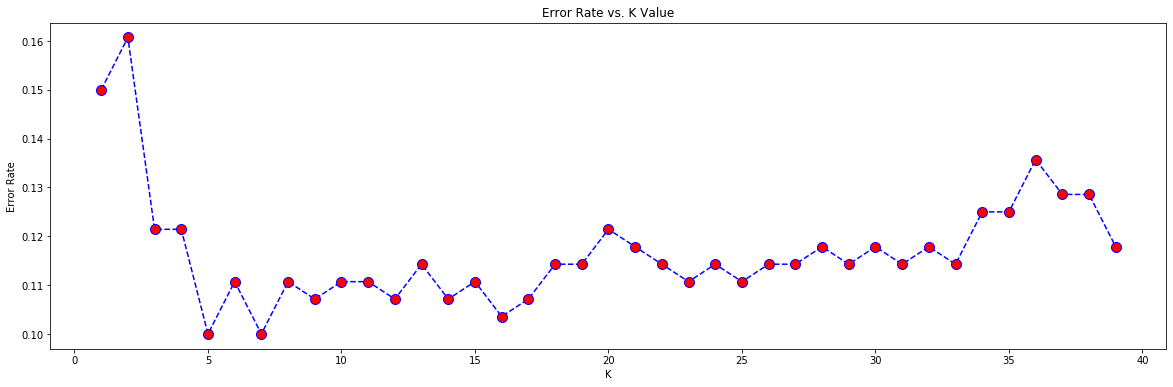

In [64]:
# lets plot graphs for Error rate vs K and accuray rate vs K

plt.figure(figsize=(20,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
        markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

Text(0, 0.5, 'Accuracy Rate')

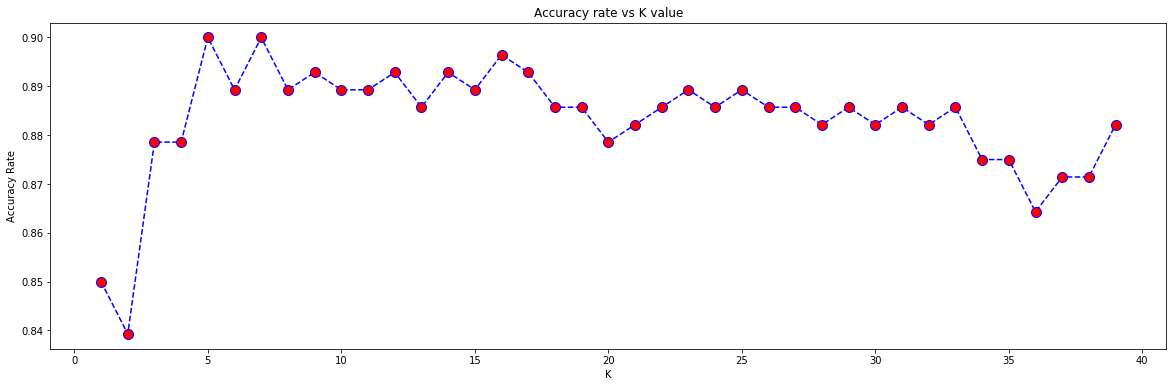

In [65]:
plt.figure(figsize=(20,6))
plt.plot(range(1,40),accuracy_rate,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.title('Accuracy rate vs K value')
plt.xlabel('K')
plt.ylabel('Accuracy Rate')

##### from the above plots, we can consider K = 5


In [67]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,Y_train)
Y_test_Pred = knn.predict(X_test)
print(confusion_matrix(Y_test,Y_test_Pred))
print(classification_report(Y_test,Y_test_Pred))

[[73  6]
 [ 4 37]]
              precision    recall  f1-score   support

           0       0.95      0.92      0.94        79
           1       0.86      0.90      0.88        41

    accuracy                           0.92       120
   macro avg       0.90      0.91      0.91       120
weighted avg       0.92      0.92      0.92       120



# Logistic Regression -  


Confusion Matrix :

[[74  5]
 [8 33]]
 
 
 Precision - 0 : 0.90
             1 : 0.87
             
 recall -    0 : 0.94
             1 : 0.80            
            

# SVM - 

Confusion Matrix :

[[76  3]
 [11 30]]
 
 
  Precision - 0 : 0.85
             1 : 0.90
             
 recall -    0 : 0.96
             1 : 0.68   
             


# KNN - K = 5

Confusion Matrix :

[[73  6]
 [ 4 37]]
 
 
   Precision - 0 : 0.95
             1 : 0.86
             
 recall -    0 : 0.92
             1 : 0.90   


with the above values, we can consider KNN with K=5
model.